# Calculating $Q_c$ from a circuit diagram

There are 3 steps in calculating Qc from a given circuit diagram. As an example, I'll use a circuit with coupling capacitance $C_a$ and a parasitic coupling capacitance $L_a$. I'll just summarize the general results here, but the steps are very repeatable. A lot of the discussion here is based on the Khalil paper and the Chunqing Deng papers.$V$ is the voltage across the resonator.
![title](circuit_diagram.jpg)

## A) Calculate $S_{21}\ =\ \frac{V_{out}}{V_{in}}$
Not a hard calculation following the circuit diagram given above. The key thing is to express everything in terms of the voltage $V$ across the resonator. 

$$
\begin{align}
S_{21} &= 2 \left[2 + j \omega C_a Z_0 - \left(\frac{1-\omega^2 L_a C_a}{2 - \omega^2 L_a C_a}\right) \right]^{-1} \cdot \left[1 + \frac{V}{2 V_{in}} \frac{j \omega C_a Z_0}{2 - \omega^2 L_a C_a}\right] \\
S_{21} &= \left(1 + \hat{\epsilon} \right) \cdot \left[1 + \frac{V}{2 V_{in}} \frac{j \omega C_a Z_0}{2 - \omega^2 L_a C_a}\right]
\end{align}
$$

The key piece, is the term that multiplies $V/V_{in}$ in the $S_{21}$ equation. I'll keep track of this term for later.

## B) Calculate the Norton current $I_N$
$I_N$ is the current through the resonator with the resonator short-circuited.
$$
I_N = V_s \cdot \frac{j \omega C_a}{2} \cdot \frac{1}{2 + j \omega C_a Z_0/2 - \omega^2 L_a C_a}
$$

## C) Calculate the Norton Admittance $G_N$
Open circuit the resonance and eliminate all current and voltage sources. Gives the admittance seen looking into the external circuit from the terminals of the resonator. 
$$
G_N = \frac{j \omega C_a}{2 + j \omega C_a Z_0/2 - \omega^2 L_a C_a}
$$

## D) Putting it all together 
Separate out $G_N = 1/R_T + j \omega C_T$. $C_T$ shifts the resonance frequency while $R_T$ contributes to the loading of the external circuit.
I'll make a quick definition of the final admittance that we care about,
$$
G^{'} = -\frac{I_N}{V_s}\cdot \frac{j \omega C_a Z_0}{2 - \omega^2 L_a C_a}.
$$

Then, 
$$
I_N = V \left[j \omega C + \frac{1}{j \omega L} + \frac{1}{R} + \frac{1}{R_T} + j \omega C_T \right].
$$

Putting all the pieces together gives the resonance frequency $\omega_0^2 = 1/L \cdot \left(C + C_T\right)$.

We can also rewrite $S_{21}$ as
$$
S_{21} = 1 + \frac{Q_e^{-1}}{1 + j 2\ Q_r\ x},
$$

with $Q_e = \omega_0 \left(C + C_T\right)/G^{'}$ and $Q_c = \omega_0 \left(C + C_T\right)/\mathcal{R}e[G^{'}]$.

## D) Summarizing $Q_c$ and $\omega_0$ for this circuit choice
A little mathematica goes a long way here and I'll just quote the final answers. I'll define 2 small parameters; $\alpha = \omega_0 C_a Z_0$ and $\beta = \omega_0 L_a/Z_0$.

$$
\omega_0 = \frac{1}{\sqrt{L C}} \cdot \left[1 + \frac{4 C_a}{C}\frac{2 - \alpha \beta}{16 + \alpha^2 - 16 \alpha \beta + 4 \alpha^2 \beta^2}\right]^{-\frac{1}{2}}
$$
and
$$
\begin{align}
Q_c &= \frac{8 C}{\omega_0 C_a^2 Z_0}\cdot \left[1 - \alpha \beta + \frac{\alpha^2}{16} + \left(\frac{\alpha \beta}{2}\right)^2 \right] \\
Q_c &= \frac{8 C}{\omega_0 C_a^2 Z_0}\cdot \left[1 - \omega_0^2 \left(L_a C_a - \left(\frac{C_a Z_0}{4}\right)^2 - \omega_0^2 \left(\frac{C_a L_a}{2}\right)^2 \right) \right]
\end{align}
$$

The leading term in $Q_c$ is exactly the same as what we usually expect. The term in bracket modifies the leading frequency dependence and accounting for it fits the measured Qc for the AC TKID chips well. In contrast, because the higher order corrections in the calculation of $\omega_0$ are all multiplied by factors of $C_a/C$ which is very small, $Q_c$ could be significantly modified without any resulting change to the measured $\omega_0$.

## E) A few other circuit models
It's worth exploring a few other circuit models to see how the frequency dependence of $Q_c$ changes.

### i) Line Mismatch
Defining $\lambda  = Z_c/Z_0$, $\Theta_T = \omega l n/c$, where $l$ is the total length of the line, $\Theta_{in} = \omega l_{in} n/c$ and $\Theta_{out} = \Theta_T - \Theta_{in}$.
$$
Q_c = \frac{8 C}{\omega_0 C_a^2 Z_0}\cdot \frac{4 \lambda^2 \cos^2 \Theta_T + (1 + \lambda^2)^2 \sin^2 \Theta_T}{\lambda^2 \left[2 (1 + \lambda^2) + (\lambda^2-1) \cos 2 \Theta_{in} + (\lambda^2-1) \sin 2 \Theta_{out}\right]}
$$

### ii) Parasitic Capacitance to GND $C_p$
With the same parasitic impedance $C_p$ on both sides of the IDC tank.
$$
Q_c = \frac{8 C}{\omega_0 C_a^2 Z_0}\cdot \left[1 + \omega_0^2\left(\frac{C_a Z_0}{4}\right)^2\left(\frac{C_a + 2 C_p}{C_a + C_p}\right)^2\right]
$$

### iii) Mutual inductance coupling the resonator inductance to inductance on feedline
This is the model explored in the Khalil paper. Defining the line inductance $L_1$ and mutual inductance $M$ and 2 small parameters, $\beta = L_1/L$ and $\gamma = M/L$. Also, $C_c = C_a/2$ and $\omega_0 L/Z_0 = \delta$.
$$
Q_c = \frac{2 C}{\omega_0 C_c^2 Z_0}\cdot \left[1 + \gamma + \frac{\alpha^2}{4}  + \frac{\gamma \alpha^2}{4} - \frac{\alpha \beta \delta}{2} + \frac{\left(4 - \alpha^2\right) \beta \gamma \delta}{4 \alpha}\right]
$$
And
$$
\omega_0 = \frac{1}{\sqrt{L C}} \cdot \left[1 + \frac{C_c}{C}\frac{-4 \left(4 + \alpha^2\right) \left(-1 + \gamma \right) + \alpha \beta \delta \left(4 + \alpha^2\left(1 - 2\gamma\right)\right)}{\left(4 + \alpha^2\right)^2}\right]^{-\frac{1}{2}}.
$$
If $\beta \rightarrow 0$, then
$$
Q_c = \frac{2 C}{\omega_0 C_c^2 Z_0}\cdot \left[1 + \gamma + \frac{\alpha^2}{4} \right].
$$
On the other hand, if $\gamma \rightarrow 0$, then
$$
\begin{align}
Q_c &= \frac{2 C}{\omega_0 C_c^2 Z_0}\cdot \left[1 + \frac{\alpha^2}{4} - \frac{\alpha \beta \delta}{2}\right] \\
    &= \frac{2 C}{\omega_0 C_c^2 Z_0}\cdot \left[1 - \omega_0^2 \left(L_1 C_c - \frac{C_c^2 Z_0^2}{2}\right)\right]
\end{align}
$$

In [1]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os, sys
from scipy.special import iv, kn
from scipy.constants import h, k,c
import scipy.optimize as opt
%matplotlib inline

K_0 = lambda x: kn(0, x)
I_0 = lambda x: iv(0, x)

In [2]:
nH = 1e-9
pF = 1e-12
cm = 1e-2
g = 1e-3
mJ = 1e-3

MHz = 1e6
mm = 1e-3
um = 1e-6

datadir = "../numerical_sims/"
spacing = 11*mm

In [3]:
Z0 = 50
L = 10*nH

In [4]:
# Adjusting for the results from the sonnet simulations
Nfingers = 502 - np.array([0, 17, 32, 47, 61, 74, 87, 100, 111, 122, 133,153])
Ca = 0.403*pF # from simulations
CC = Ca/2 # from simulations
La = 0.0*nH
C_true = (0.05*Nfingers + 0.788)*pF
Lpar = (6e-6*Nfingers**2 + 1e-3*Nfingers + 1.780)*nH
Lind = 10.057*nH #5.998*nH with no kinetic inductance
Ltot = Lind + Lpar
wr_true = 1./(Ltot*C_true)**0.5
fr_true = wr_true/2/pi/MHz
y_true = wr_true * CC * Z0
Qc_true = (C_true/Ca)*(8/(Ca*Z0*wr_true) - 8*(La*wr_true/Z0) + wr_true*Ca*Z0/2 + 2*La**2*wr_true**3*Ca/Z0)

In [24]:
freq_meas = np.mean(np.loadtxt(datadir + 'CF190822_f0_vs_P.txt'), axis=1)
Qc_meas = np.mean(np.loadtxt(datadir + 'CF190822_Qcs_vs_P.txt'), axis=1)
phic_meas = np.mean(np.loadtxt(datadir + 'CF190822_phics_vs_P.txt'), axis=1)
resoindices = np.array([0,1,2,3,4,6,8,9])
fr_fine1 = np.r_[230:290:1000j]

freq_meas2 = np.mean(np.loadtxt(datadir + 'CF69C_f0_vs_P.txt')[:, :5], axis=1)
Qc_meas2 = np.mean(np.loadtxt(datadir + 'CF69C_Qcs_vs_P.txt')[:, :5], axis=1)
phic_meas2 = np.mean(np.loadtxt(datadir + 'CF69C_phics_vs_P.txt')[:, :5], axis=1)
resoindices2 = np.array([0,1,4,5,7,9])
fr_fine2 = np.r_[270:330:1000j]

freq_meas3 = np.mean(np.loadtxt(datadir + 'CF190905A_f0_vs_P.txt')[:, :5], axis=1)
Qc_meas3 = np.mean(np.loadtxt(datadir + 'CF190905A_Qcs_vs_P.txt')[:, :5], axis=1)
phic_meas3 = np.mean(np.loadtxt(datadir + 'CF190905A_phics_vs_P.txt')[:, :5], axis=1)
resoindices3 = np.array([1, 5, 6, 8, 10, 11])
fr_fine3 = np.r_[250:310:1000j]
mask = np.ones_like(freq_meas2, dtype=bool)
mask[1] = False

The leading order term in $Q_c$ assuming all the resonators have about the same $L$ and $C_c$, which they should has the frequency dependence 
$$
\begin{align}
Q_c &= \frac{2 C}{\omega_0 C_c^2 Z_0}\\
    &=  \frac{2}{L \omega_0^3 C_c^2 Z_0}\\
    &=  \frac{2 L \omega_*/Z_0}{\left(\omega_0/\omega_*\right)^3}
\end{align}
$$
with $\omega_*^2 = 1/\left(L C_c\right)$.

However, $Q_c$ drops with frequency much faster than with the -3 dependence. We need a much faster drop in $Q_c$ with frequency which we can motivate considering the different circuit models. I introduced one more fitting parameter $\omega_{ref}$ and extended the model to
$$
Q_c =  \frac{2 L \omega_*/Z_0}{\left(\omega_0/\omega_*\right)^3} \left[1 - \left(\frac{\omega_0}{\omega_{ref}}\right)^2\right]
$$

In [25]:
def Qc_model(f, wstar, fref):
	w = 2*pi*f
	return (2*L*wstar*MHz/Z0*(w/wstar)**-3)*(1 - (f/fref)**2)

def Qc_model_leading(f, wstar):
	w = 2*pi*f
	return (2*L*wstar*MHz/Z0*(w/wstar)**-3)

In [30]:
w_star = 1./np.sqrt(L*CC)
f_star = w_star/2/pi/MHz
popt, pcov = opt.curve_fit(Qc_model, freq_meas, Qc_meas, p0=[w_star/MHz, 1000])
sigma = np.sqrt(np.diag(pcov))
fstar = popt[0]/2/pi
sigfstar = sigma[0]/2/pi
fref = popt[1]
sigfref = sigma[1]
popt2, pcov2 = opt.curve_fit(Qc_model, freq_meas2[mask], Qc_meas2[mask],p0=[w_star/MHz, 1000])
sigma2 = np.sqrt(np.diag(pcov2))
fstar2 = popt2[0]/2/pi
sigfstar2 = sigma2[0]/2/pi
fref2 = popt2[1]
sigfref2 = sigma2[1]
popt3, pcov3 = opt.curve_fit(Qc_model, freq_meas3, Qc_meas3,p0=[w_star/MHz, 1000])
sigma3 = np.sqrt(np.diag(pcov3))
fstar3 = popt3[0]/2/pi
sigfstar3 = sigma3[0]/2/pi
fref3 = popt3[1]
sigfref3 = sigma3[1]
Ca1 = 1./((popt[0]*MHz)**2*L/2)
Ca2 = 1./((popt2[0]*MHz)**2*L/2)
Ca3 = 1./((popt3[0]*MHz)**2*L/2)

La1 = (popt[0]/(2*pi*popt[1]))**2*L/nH
La2 = (popt2[0]/(2*pi*popt2[1]))**2*L/nH
La3 = (popt3[0]/(2*pi*popt3[1]))**2*L/nH
sigLa1 = 2*La1*np.sqrt((sigma[0]/popt[0])**2 + (sigma[1]/popt[1])**2)
sigLa2 = 2*La2*np.sqrt((sigma2[0]/popt2[0])**2 + (sigma2[1]/popt2[1])**2)
sigLa3 = 2*La3*np.sqrt((sigma3[0]/popt3[0])**2 + (sigma3[1]/popt3[1])**2)

popt4, pcov4 = opt.curve_fit(Qc_model_leading, freq_meas, Qc_meas, p0=[w_star/MHz])
popt5, pcov5 = opt.curve_fit(Qc_model_leading, freq_meas2[mask], Qc_meas2[mask], p0=[w_star/MHz])
popt6, pcov6 = opt.curve_fit(Qc_model_leading, freq_meas3, Qc_meas3, p0=[w_star/MHz])

Qc_meas_fit = Qc_model(fr_fine1, *popt)
Qc_meas_fit2 = Qc_model(fr_fine2, *popt2)
Qc_meas_fit3 = Qc_model(fr_fine2, *popt3)
Qc_measb_fit = Qc_model_leading(fr_fine1, *popt4)
Qc_measb_fit2 = Qc_model_leading(fr_fine2, *popt5)
Qc_measb_fit3 = Qc_model_leading(fr_fine3, *popt6)

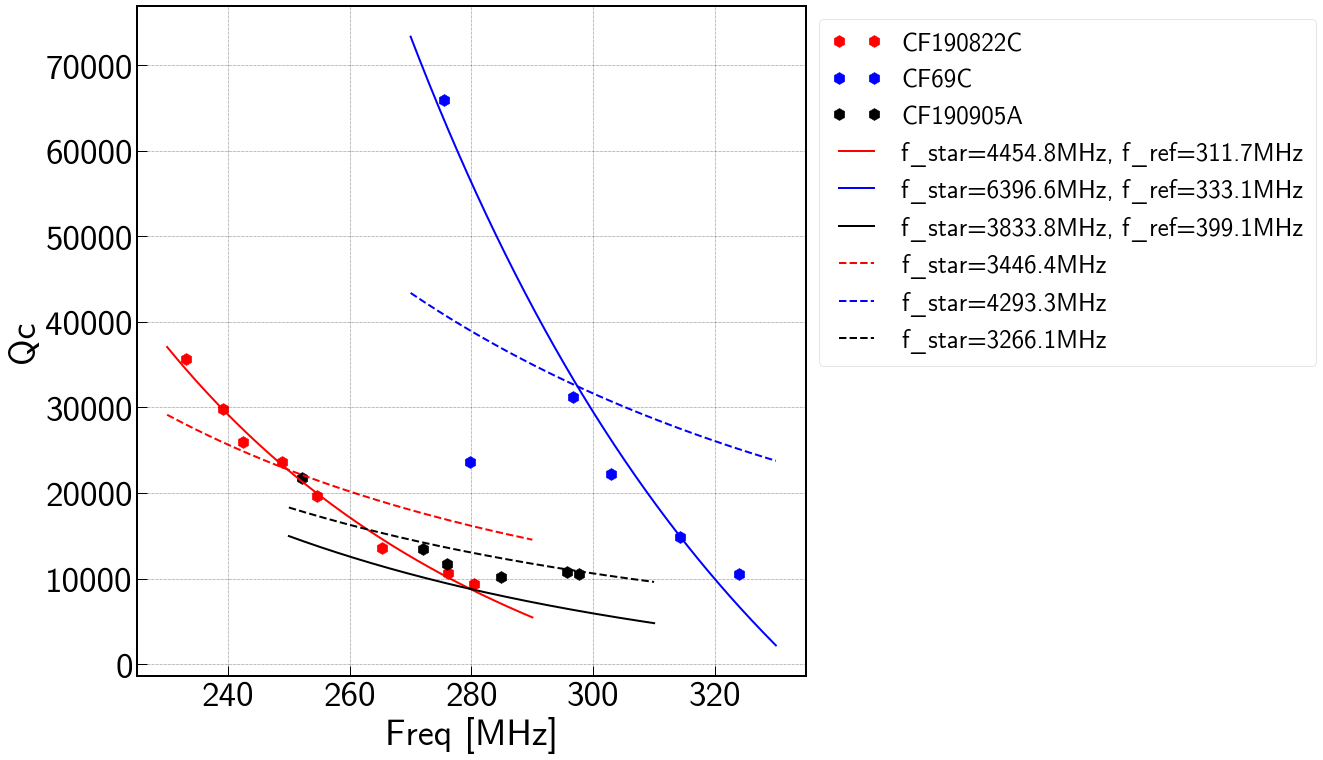

In [33]:
plt.figure(figsize=(12,12))
plt.plot(freq_meas, Qc_meas, 'rh', label='CF190822C', ms=12)
plt.plot(freq_meas2, Qc_meas2, 'bh', label='CF69C', ms=12)
plt.plot(freq_meas3, Qc_meas3, 'kh', label='CF190905A', ms=12)
plt.plot(fr_fine1, Qc_meas_fit, 'r-',
         label='f_star={0:1.1f}MHz, f_ref={1:1.1f}MHz'.format(fstar, fref))
plt.plot(fr_fine2, Qc_meas_fit2,'b-',
        label='f_star={0:1.1f}MHz, f_ref={1:1.1f}MHz'.format(fstar2, fref2))
plt.plot(fr_fine3, Qc_meas_fit3,'k-',
        label='f_star={0:1.1f}MHz, f_ref={1:1.1f}MHz'.format(fstar3, fref3))
plt.plot(fr_fine1, Qc_measb_fit, 'r--',
         label='f_star={0:1.1f}MHz'.format(popt4[0]/2/pi))
plt.plot(fr_fine2, Qc_measb_fit2,'b--',
         label='f_star={0:1.1f}MHz'.format(popt5[0]/2/pi))
plt.plot(fr_fine3, Qc_measb_fit3,'k--',
         label='f_star={0:1.1f}MHz'.format(popt6[0]/2/pi))
plt.grid()
lgd = plt.legend(framealpha=0.5, bbox_to_anchor=(1.0,1.0))
plt.xlabel('Freq [MHz]')
plt.ylabel('Qc')
plt.savefig('Qc_vs_frequency.png');

In [32]:
print ("CF190822C Wafer")
print ("Parasitic inductance {0:1.2f} nH pm {1:1.2f} nH".format(La1, sigLa1))
print ("CF69C Wafer")
print ("Parasitic inductance {0:1.2f} nH pm {1:1.2f} nH".format(La2, sigLa2))
print ("CF190905A Wafer")
print ("Parasitic inductance {0:1.2f} nH pm {1:1.2f} nH".format(La3, sigLa3))

CF190822C Wafer
Parasitic inductance 2042.42 nH pm 70.73 nH
CF69C Wafer
Parasitic inductance 3687.14 nH pm 192.64 nH
CF190905A Wafer
Parasitic inductance 922.56 nH pm 259.77 nH


The value of inductance needed is huge! On the order of 2-4 uH! Not sure what could cause that exactly. Surprisingly, this large value of inductance still doesn't shift the resonance frequency significantly. This may be why the resonance frequency can match the prediction but not $Q_c$. The Khalil model also gives the same value of the inductance, which means we could have it anywhere on the line and have the same effect on $Q_c$.

In [54]:
laca1 = 1./(2*pi*fref*MHz)**2
laca2 = 1./(2*pi*fref2*MHz)**2
w0_1 = 2*pi*freq_meas*MHz
w0_2 = 2*pi*freq_meas2*MHz
C1 = 1./(2*pi*freq_meas*MHz)**2/L
C2 = 1./(2*pi*freq_meas2*MHz)**2/L

shift1 = 1./np.sqrt(1 + 4*Ca1/C1*(2-w0_1**2*laca1)/(16+w0_1**2*(Ca1*Z0)**2 - 16*w0_1**2*laca1 + 4*w0_1**4*laca1**2))
shift2 = 1./np.sqrt(1 + 4*Ca2/C2*(2-w0_2**2*laca2)/(16+w0_2**2*(Ca2*Z0)**2 - 16*w0_2**2*laca2 + 4*w0_2**4*laca2**2))

In [55]:
print (shift1)
print (shift2)

[0.99810603 0.99796349 0.99788129 0.99771722 0.99755947 0.99723075
 0.99685307 0.99668777]
[0.99859309 0.99852522 0.99822239 0.99809236 0.99783364 0.99757523]
